1. [P. Winkler] One hundred people line up to board an airplane. Each has a boarding pass with
assigned seat. However, the first person to board has lost his boarding pass and takes a random
seat. After that, each person takes the assigned seat if it is unoccupied, and one of unoccupied
seats at random otherwise. What is the probability that the last person to board gets to sit in
his assigned seat?

In [77]:
import random
import matplotlib.pyplot as plt 
import numpy as np

In [64]:
def boarding_pass(n):
    assigned_seats = list(range(n))
    
    # remove a random seat (first person)
    random.shuffle(assigned_seats)
    assigned_seats.pop()
    remaining_seats = assigned_seats
    
    for i in range(1,n-1):
        
        if i in remaining_seats: # person has their seat
            remaining_seats.remove(i)
        else: # person random seat
            remaining_seats.pop()
    return remaining_seats == [n-1]

True count: 53
False count: 47
Ratio of True to False: 1.127659574468085
Variance of the data: 0.24909999999999993


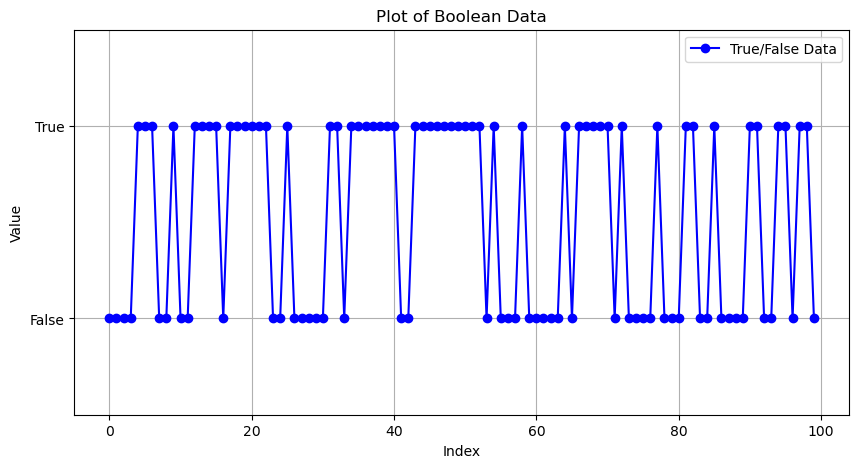

In [112]:
# Lets simulate this N times
N = 100
result = [boarding_pass(n) for n in [100]*N]

# Convert True/False to 1/0
numeric_data = [1 if value else 0 for value in result]

# Calculate the ratio of True to False values
true_count = np.sum(numeric_data)
false_count = len(numeric_data) - true_count
ratio = true_count / false_count if false_count != 0 else float('inf')

# Calculate the variance of the data
variance = np.var(numeric_data)

# Display the results
print(f"True count: {true_count}")
print(f"False count: {false_count}")
print(f"Ratio of True to False: {ratio}")
print(f"Variance of the data: {variance}")

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(numeric_data, marker='o', linestyle='-', color='b', label='True/False Data')
plt.ylim(-0.5, 1.5)  # Set y-axis limits to show 0 and 1 clearly
plt.yticks([0, 1], ['False', 'True'])  # Label y-axis with False and True
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Boolean Data')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
# How many times do we have to simulate this to reach convergence

# We will run each V times to get a variance

runs = range(2,1001)

final_values = []
final_variance = []


for run in runs:

    result = [boarding_pass(n) for n in [100]*run]

    # Convert True/False to 1/0
    numeric_data = [1 if value else 0 for value in result]
    
    final_values.append(np.mean(numeric_data))
    final_variance.append(np.var(numeric_data))
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


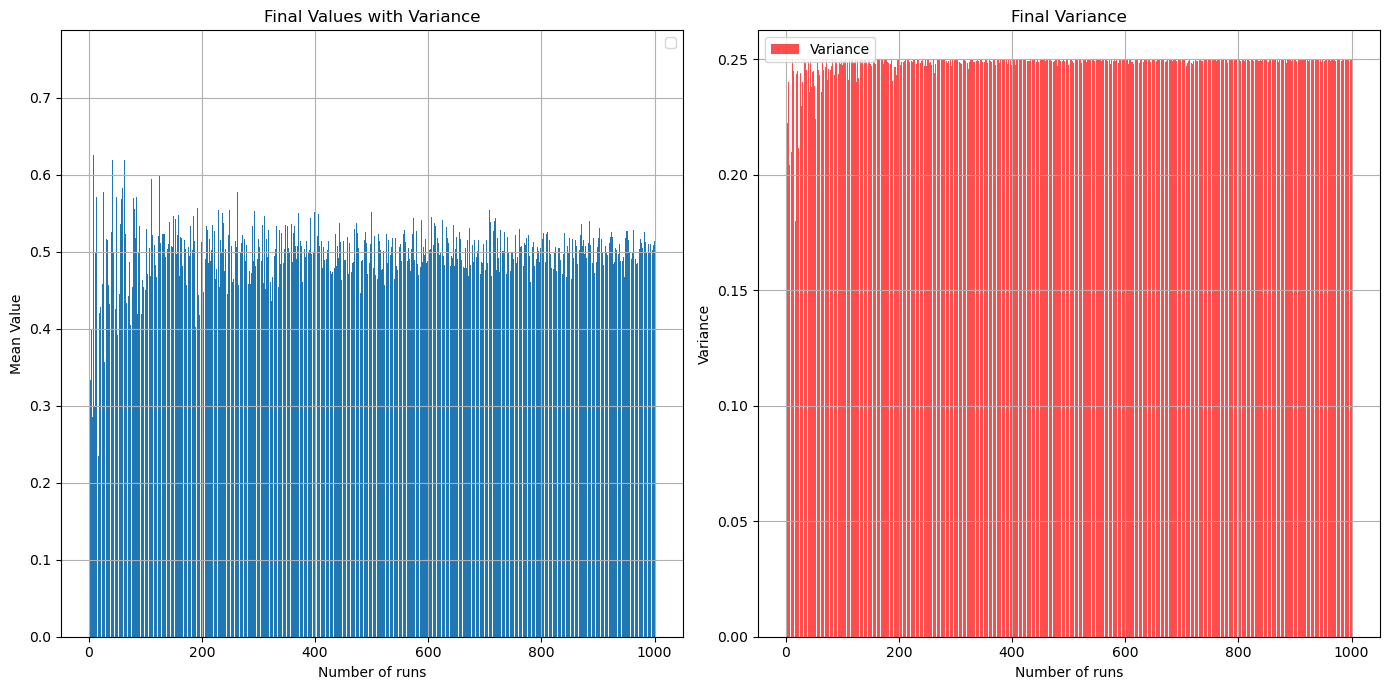

In [120]:
# Plot final_values with variance as error bars
plt.figure(figsize=(14, 7))

# Plot final_values
plt.subplot(1, 2, 1)
plt.bar(runs, final_values)#, yerr=final_variance, capsize=5, color='b', alpha=0.7, label='Mean Values')
plt.xlabel('Number of runs')
plt.ylabel('Mean Value')
plt.title('Final Values with Variance')
plt.legend()
plt.grid(True)

# Plot final_variance
plt.subplot(1, 2, 2)
plt.bar(runs, final_variance, color='r', alpha=0.7, label='Variance')
plt.xlabel('Number of runs')
plt.ylabel('Variance')
plt.title('Final Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
    

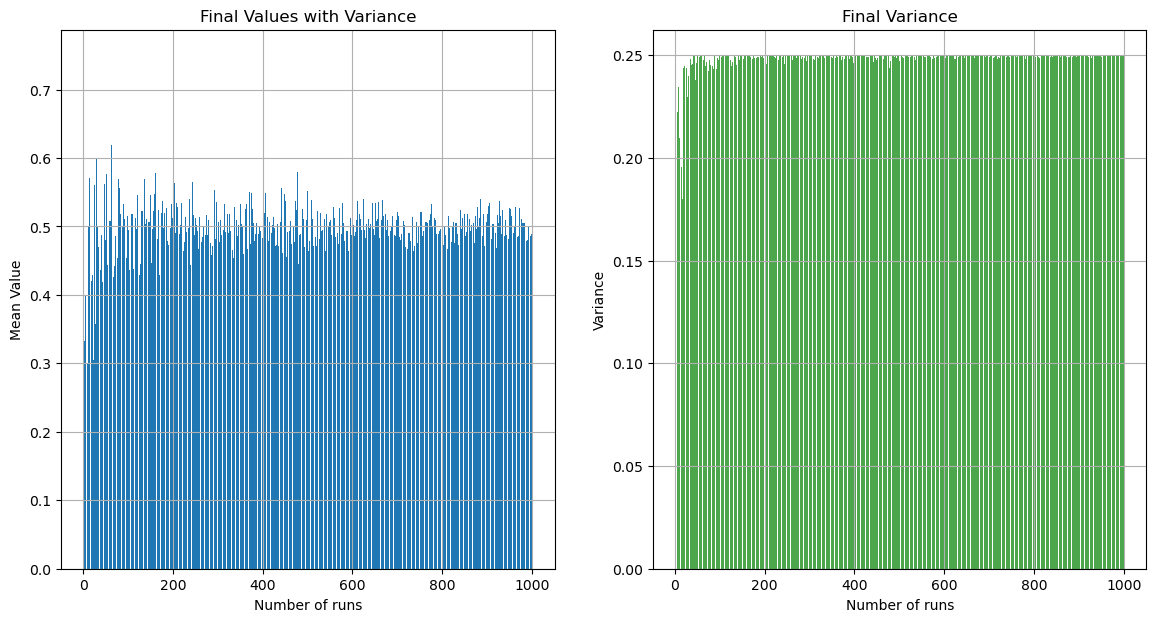

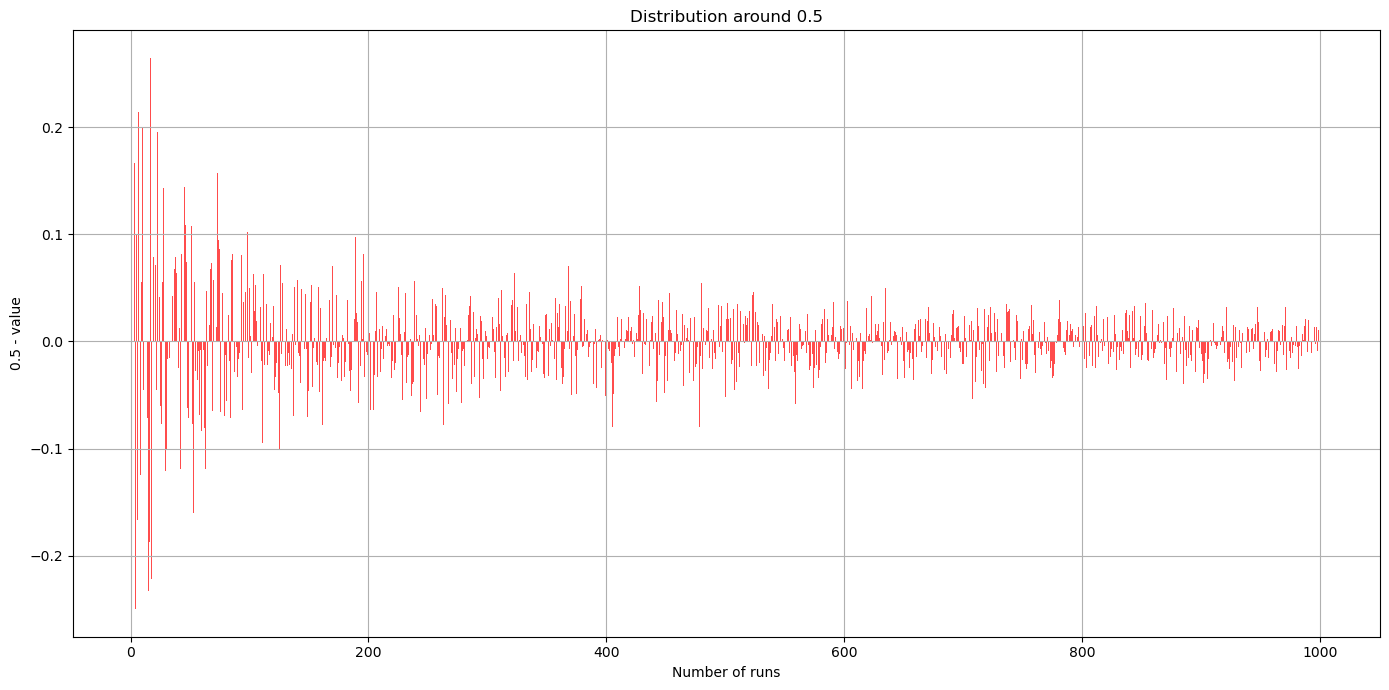

In [133]:
# Plot final_values with variance as error bars
plt.figure(figsize=(14, 7))

# Plot final_values
plt.subplot(1, 2, 1)
plt.bar(runs, final_values)
plt.xlabel('Number of runs')
plt.ylabel('Mean Value')
plt.title('Final Values with Variance')
plt.grid(True)

# Plot final_variance
plt.subplot(1, 2, 2)
plt.bar(runs, final_variance, color='g', alpha=0.7, label='Variance')
plt.xlabel('Number of runs')
plt.ylabel('Variance')
plt.title('Final Variance')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.bar(runs, 0.5- np.array(final_values), color='r', alpha=0.7)
plt.xlabel('Number of runs')
plt.ylabel('0.5 - value')
plt.title('Distribution around 0.5')
plt.grid(True)
plt.tight_layout()


plt.tight_layout()
plt.show()